In [30]:
import pandas as pd
pd.reset_option('^display.', silent=True)

import pandas as pd
import ast

df_movies = pd.read_csv('../raw_data/movies_with_tokenized_plots.csv')

# Convert the string representation of lists back into actual lists of tokens
df_movies['wiki_plot_tokenized'] = df_movies['wiki_plot_tokenized'].apply(ast.literal_eval)

df_movies.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,wiki_plot_tokenized
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...","[bartender, work, saloon, serve, drink, custom..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...","[moon, paint, smile, face, hang, park, night, ..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...","[film, minute, long, compose, shot, girl, sit,..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,"[second, consist, shot, shot, set, wood, winte..."
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"[early, know, adaptation, classic, fairytale, ..."


In [31]:
#check for missing values
df_movies.isnull().sum()

Release Year              0
Title                     0
Origin/Ethnicity          0
Director                  0
Cast                   1422
Genre                     0
Wiki Page                 0
Plot                      0
wiki_plot_tokenized       0
dtype: int64

In [32]:
#how many genres are there?
df_movies['Genre'].nunique()

2265

In [33]:
#how many origins are there?
df_movies['Origin/Ethnicity'].nunique()

24

In [34]:
#how many genres for each origin?
df_movies.groupby ('Origin/Ethnicity')['Genre'].nunique()

Origin/Ethnicity
American        771
Assamese          3
Australian      115
Bangladeshi      27
Bengali          61
Bollywood       545
British         242
Canadian        186
Chinese         205
Egyptian         19
Filipino         56
Hong Kong       150
Japanese        246
Kannada          65
Malayalam       144
Malaysian        31
Maldivian         2
Marathi          62
Punjabi          34
Russian          51
South_Korean     23
Tamil           110
Telugu          179
Turkish          13
Name: Genre, dtype: int64

## Let's look at American movies only

We see above that there are *771* genres in just American movies! We find out below that 

In [35]:
am_movies = df_movies[df_movies['Origin/Ethnicity'] == 'American']
am_movies = am_movies.reset_index(drop=True)

In [36]:
# Find duplicated movies based on both Title and Release Year
duplicated_movies = am_movies[am_movies.duplicated(subset=['Title', 'Release Year'], keep=False)]

# Display the duplicated movies
display(duplicated_movies)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,wiki_plot_tokenized
7975,1965,Harlow,American,Gordon Douglas,"Carroll Baker, Raf Vallone, Angela Lansbury, P...","drama, biography",https://en.wikipedia.org/wiki/Harlow_(Paramoun...,The film opens with Harlow as a struggling ext...,"[film, open, harlow, struggle, extra, bit, act..."
7976,1965,Harlow,American,Alex Segal,"Carol Lynley, Efrem Zimbalist, Jr., Ginger Rogers",biography,https://en.wikipedia.org/wiki/Harlow_(Magna_film),Noticing a beautiful girl in the background of...,"[notice, beautiful, girl, background, laurel, ..."
8868,1972,Treasure Island,American,Hal Sutherland,"Richard Dawson, Davy Jones, Dal McKennon",adventure,https://en.wikipedia.org/wiki/Treasure_Island_...,Enchanted by the idea of locating treasure bur...,"[enchant, idea, locate, treasure, bury, captai..."
8869,1972,Treasure Island,American,John Hough,"Orson Welles, Lionel Stander, Walter Slezak",adventure,https://en.wikipedia.org/wiki/Treasure_Island_...,Jim Hawkins (Kim Burfield) is a young boy who ...,"[jim, hawkins, kim, burfield, young, boy, work..."
17158,2016,23,American,Moana,Ron Clements\r\nJohn Musker,auli'i cravalho dwayne johnson,https://en.wikipedia.org/wiki/Moana_(2016_film),"On the Polynesian island of Motunui, the inhab...","[polynesian, island, motunui, inhabitant, wors..."
17162,2016,23,American,A Monster Calls,J. A. Bayona,unknown,https://en.wikipedia.org/wiki/A_Monster_Calls_...,Twelve-year-old Connor O'Malley must face his ...,"[year, old, connor, omalley, face, mother, ter..."


In [37]:
# Find duplicated movies based on both Title and Plot
duplicated_movies2 = am_movies[am_movies.duplicated(subset=['Title', 'Plot'], keep=False)]

# Display the duplicated movies
display(duplicated_movies2)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,wiki_plot_tokenized
149,1916,The Other Side of the Door,American,Tom Ricketts,"Harold Lockwood, May Allison",romantic drama,https://en.wikipedia.org/wiki/The_Other_Side_o...,"Sets in the 19th century, the plot centered on...","[set, century, plot, center, man, harold, lock..."
189,1917,Wild and Woolly,American,John Emerson,Douglas Fairbanks,unknown,https://en.wikipedia.org/wiki/Wild_and_Woolly,"As described in a film magazine review,[1] Jef...","[describe, film, magazine, review, jeff, hilli..."
227,1918,Nine-Tenths of the Law,American,B. Reeves Eason,Mitchell Lewis,drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene...","[describe, film, magazine, jules, leneau, lewi..."
286,1919,Nine-Tenths of the Law,American,B. Reeves Eason,"Mitchell Lewis, Jimsy Maye",drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene...","[describe, film, magazine, jules, leneau, lewi..."
310,1920,Among Those Present,American,Fred C. Newmeyer,"Harold Lloyd, Mildred Davis",comedy short,https://en.wikipedia.org/wiki/Among_Those_Present,Mrs. O'Brien (Herring) is eager to be accepted...,"[mrs, obrien, herring, eager, accept, high, so..."
...,...,...,...,...,...,...,...,...,...
17026,2015,Snowden,American,Oliver Stone,Joseph Gordon-Levitt\r\nShailene Woodley,biographical political thriller,https://en.wikipedia.org/wiki/Snowden_(film),"In 2013, Edward Snowden arranges a clandestine...","[edward, snowden, arrange, clandestine, meetin..."
17055,2016,The Other Side of the Door,American,Johannes Roberts,Sarah Wayne Callies\r\nJeremy Sisto,horror,https://en.wikipedia.org/wiki/The_Other_Side_o...,"Sets in the 19th century, the plot centered on...","[set, century, plot, center, man, harold, lock..."
17136,2016,Snowden,American,Oliver Stone,Joseph Gordon-Levitt\r\nShailene Woodley\r\nZa...,unknown,https://en.wikipedia.org/wiki/Snowden_(film),"In 2013, Edward Snowden arranges a clandestine...","[edward, snowden, arrange, clandestine, meetin..."
17163,2016,Rings,American,F. Javier Gutiérrez,NaN,unknown,https://en.wikipedia.org/wiki/Rings_(2016_film),"On an airplane bound for Seattle, a man reveal...","[airplane, bind, seattle, man, reveal, watch, ..."


In [38]:
num_duplicates = am_movies.duplicated(subset=['Title', 'Plot'], keep=False).sum()
print(f"Number of duplicated movies: {num_duplicates}")

Number of duplicated movies: 176


In [39]:
print(f"Number of movies before removing duplicates: {len(am_movies)}")

# Remove duplicates based on both Title and Plot, keeping the first occurrence
# am_movies = am_movies.drop_duplicates(subset=['Title', 'Plot'], keep='first')

# Display the updated DataFrame
print(f"Number of movies after removing duplicates: {len(am_movies)}")

Number of movies before removing duplicates: 17377
Number of movies after removing duplicates: 17377


In [40]:
American_genres = am_movies['Genre'].unique()
American_genres

array(['unknown', 'western', 'comedy', 'short',
       'short action/crime western', 'short film', 'biographical',
       'drama', 'adventure', 'short fantasy', 'silent sports', 'horror',
       'crime', 'drama, horror', 'historical drama', 'fantasy drama',
       'biographical drama', 'documentary drama', 'fantasy',
       'adventure serial', 'epic', 'historical', 'comedy short',
       'comedy, western', 'biography', 'action adventure',
       'western drama', 'short comedy', 'comedy–drama', 'romantic drama',
       'mystery', 'crime drama', 'romance',
       'sexual hygiene/exploitation film', 'comedy drama', 'war drama',
       'spy', 'romantic comedy', 'propaganda', 'ww1 propaganda', 'biopic',
       'animated series', 'drama romance', 'melodrama', 'period drama',
       'swashbuckler', 'romance drama', 'drama, adventure',
       'crime comedy', 'documentary', 'comedy western', 'fantasy, family',
       'war', 'comedy, adventure', 'fantasy, adventure', 'thriller',
       'dramatic

In [41]:
print(df_movies['Genre'].value_counts()['unknown'])
print(df_movies['Plot'].count())

6083
34886


In [42]:
print(am_movies['Genre'].value_counts()['unknown'])
print(am_movies['Plot'].count())

398
17377


In [43]:
#how many genres for each movie in ALL MOVIES min and max and average?
display(df_movies.groupby ('Title')['Genre'].count().min())
display(df_movies.groupby ('Title')['Genre'].count().max())
display(df_movies.groupby ('Title')['Genre'].count().mean())

1

8

1.0756660088801184

<AxesSubplot:ylabel='Frequency'>

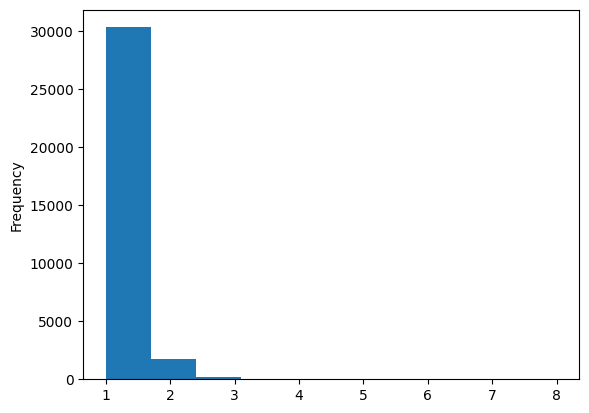

In [44]:
#plot the distribution of number of genres per movie in ALL MOVIES

df_movies.groupby ('Title')['Genre'].count().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

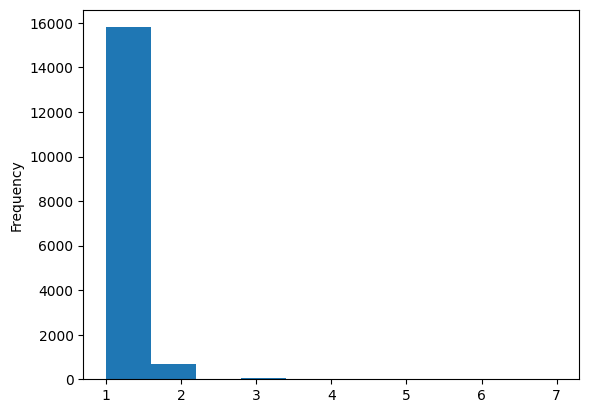

In [45]:
#plot the distribution of number of genres per American movie

am_movies.groupby ('Title')['Genre'].count().plot(kind='hist')

In [46]:
#which genres are most common in American movies?

am_movies['Genre'].value_counts().head(10)

drama          3549
comedy         3059
western         855
horror          782
action          495
thriller        481
adventure       442
crime drama     414
unknown         398
musical         386
Name: Genre, dtype: int64

In [47]:
#make a list of the top 10 genres in American movies
top_10_US_genres = am_movies['Genre'].value_counts().head(10).index.tolist()
top_10_US_genres

['drama',
 'comedy',
 'western',
 'horror',
 'action',
 'thriller',
 'adventure',
 'crime drama',
 'unknown',
 'musical']

In [48]:
# Find the top 10 directors for American movies released in the 2000s
top_10_directors = am_movies[am_movies['Release Year'] >= 2000]['Director'].value_counts().head(10)
top_10_directors

Tyler Perry          16
Ridley Scott         15
Steven Soderbergh    14
Clint Eastwood       13
Richard Linklater    13
Woody Allen          13
Steven Spielberg     11
Shawn Levy           11
Michael Bay          10
Tim Burton           10
Name: Director, dtype: int64

## We choose a random 10 movies from the top 10 genres by top 10 directors, and keep using this set for testing.

In [49]:
#randomly select 1 American movie from a genre in top_10_US_genres only by top_10_directors

# american_movies_by_top_directors = american_movies[american_movies['Director'].isin(top_10_directors.index)]

# selected_movies = pd.DataFrame()

# # Iterate over each genre in top_10_US_genres
# for genre in top_10_US_genres:
#     # Filter movies belonging to the current genre
#     genre_movies = american_movies_by_top_directors[american_movies_by_top_directors['Genre'].str.contains(genre, na=False)]

#     # Randomly select one movie from the filtered DataFrame
#     if not genre_movies.empty:
#         selected_movie = genre_movies.sample(n=1)
#         selected_movies = pd.concat([selected_movies, selected_movie])

# # Reset the index of the new DataFrame
# selected_movies.reset_index(drop=True, inplace=True)
# selected_movies

In [50]:
preselected_movies = am_movies[(am_movies['Title'] == 'Wonder Wheel') |
          (am_movies['Title'] == 'A Madea Christmas') |
          (am_movies['Title'] == 'High Plains Drifter') |
            (am_movies['Title'] == 'Dark Shadows') |
            (am_movies['Title'] == 'Prometheus') |
            (am_movies['Title'] == 'Indiana Jones and the Kingdom of the Crystal Skull') |
            (am_movies['Title'] == 'True Crime') |
            (am_movies['Title'] == '1941') |
            (am_movies['Title'] == 'Jersey Boys')]


#print(preselected_movies)

#save preselected movies as a pd dataframe selected_movies
selected_movies = preselected_movies
display(selected_movies)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,wiki_plot_tokenized
8930,1973,High Plains Drifter,American,Clint Eastwood,"Clint Eastwood, Geoffrey Lewis, Verna Bloom, M...",western,https://en.wikipedia.org/wiki/High_Plains_Drifter,A mysterious stranger rides out of the desert ...,"[mysterious, stranger, ride, desert, isolate, ..."
9557,1979,1941,American,Steven Spielberg,"John Belushi, Ned Beatty, Dan Aykroyd, John Ca...",unknown,https://en.wikipedia.org/wiki/1941_(film),"On Saturday, December 13, 1941, at 7:01 a.m., ...","[saturday, december, woman, goes, swim, califo..."
13575,1999,True Crime,American,Clint Eastwood,"Clint Eastwood, Isaiah Washington, Denis Leary",crime drama,https://en.wikipedia.org/wiki/True_Crime_(1999...,"Steve Everett, an Oakland journalist recoverin...","[steve, everett, oakland, journalist, recover,..."
15461,2008,Indiana Jones and the Kingdom of the Crystal S...,American,Steven Spielberg,"Harrison Ford, Karen Allen, Shia LaBeouf, Cate...",adventure,https://en.wikipedia.org/wiki/Indiana_Jones_an...,"In 1957, Indiana Jones and his partner George ...","[indiana, jones, partner, george, mac, mchale,..."
16239,2012,Dark Shadows,American,Tim Burton,"Johnny Depp, Michelle Pfeiffer, Helena Bonham ...",horror comedy,https://en.wikipedia.org/wiki/Dark_Shadows_(film),"In 1760, the Collins family moves from Liverpo...","[collins, family, liverpool, england, maine, e..."
16351,2012,Prometheus,American,Ridley Scott,"Noomi Rapace, Michael Fassbender, Guy Pearce, ...","action, horror, science fiction",https://en.wikipedia.org/wiki/Prometheus_(2012...,"As a spacecraft departs a planet, a humanoid a...","[spacecraft, depart, planet, humanoid, alien, ..."
16608,2013,A Madea Christmas,American,Tyler Perry,"Tyler Perry, Kathy Najimy, Chad Michael Murray...",comedy,https://en.wikipedia.org/wiki/A_Madea_Christma...,"In Atlanta, Georgia Mabel ""Madea"" Simmons (Tyl...","[atlanta, georgia, mabel, madea, simmons, tyle..."
16811,2014,Jersey Boys,American,Clint Eastwood,John Lloyd Young\r\nErich Bergen\r\nVincent Pi...,musical,https://en.wikipedia.org/wiki/Jersey_Boys_(film),"In Belleville, New Jersey in 1951, Tommy DeVit...","[belleville, new, jersey, tommy, devito, perfo..."
17359,2017,Wonder Wheel,American,Woody Allen,Woody Allen (director/screenplay); Kate Winsle...,"crime, drama",https://en.wikipedia.org/wiki/Wonder_Wheel_(film),"Mickey Rubin, a Coney Island life guard with a...","[mickey, rubin, coney, island, life, guard, as..."


In [51]:
# four_movies = am_movies[(am_movies['Title'] == 'Dark Shadows') |
#             (am_movies['Title'] == 'Indiana Jones and the Kingdom of the Crystal Skull') |
#             (am_movies['Title'] == 'True Crime') |
#             (am_movies['Title'] == 'Jersey Boys')]


Synopses on the internet:

**Dark Shadows**
In 18th-century Maine, Barnabas Collins (Johnny Depp) presides over the town of Collinsport. A rich and powerful playboy, Barnabas seals his own doom when he breaks the heart of a witch named Angelique (Eva Green). Angelique turns Barnabas into a vampire and buries him alive. Two centuries later, Barnabas escapes from his tomb and finds 1972 Collinsport a very different place. His once-grand estate has fallen into ruin, and the dysfunctional remnants of his family have fared little better.

**Indiana Jones and the Kingdom of the Crystal Skull**
It's the height of the Cold War, and famous archaeologist Indiana Jones (Harrison Ford), returning from his latest adventure, finds out his job at Marshall College is in jeopardy. He meets Mutt (Shia La Beouf), a young man who wants Indy to help him find the legendary Crystal Skull of Akator, and the pair set out for Peru. However, deadly agent Irina Spalko (Cate Blanchett) is searching for the powerful artifact, too, because the Soviets believe it can help them conquer the world.

**True Crime**
Journalist Steve Everett (Clint Eastwood) has been sober two months, but things are still going badly. Steve's marriage to Barbara (Diane Venora) is barely holding together, and his editor (Denis Leary) hates him, since Steve has been having an affair with his wife. A chance assignment finds Everett interviewing death row inmate Frank Beachum (Isaiah Washington). When Everett uncovers evidence indicating Beachum may be innocent, he must race against time to uncover the truth.

**Jersey Boys**
In the 1960s, four scrappy young men from New Jersey -- Frankie Valli (John Lloyd Young), Bob Gaudio (Erich Bergen), Nick Massi (Michael Lomenda) and Tommy DeVito (Vincent Piazza) -- have the magic sound that propels them from singing under streetlights to singing in spotlights. With songs like "Sherry," "Big Girls Don't Cry" and "Walk Like a Man," the quartet finds itself at the top of the charts. However, personal and professional problems threaten to tear the group apart.

Possible queries:

**Dark Shadows**
Johhny Depp as a vampire in the 18th century. A witch is in love with him.
horror comedy

**Indiana Jones and the Kingdom of the Crystal Skull**
Indiana Jones in the Cold War looking for a crystal skull.
adventure


**True Crime**
A journalist interviewing a death row inmate who is innocent.
A journalist, Eastwood, interviewing a death row inmate who is innocent.
A journalist has 12 hours to save a death row inmate who is innocent.
crime, drama

**Jersey Boys**
A musical about young men in a band that becomes famous.
musical

In [52]:
am_movie_plot = am_movies['wiki_plot_tokenized']

IDEA: Add the metadata (Director, Cast, Genre) to 'wiki_plot_tokenized', simply by adding it at the end of the list of tokens. E.g. "Boone's daughter befriends an Indian maiden (...). he kills the Indian chief."
```
['boone',
 'daughter',
 'befriend',
 'indian',
 'maiden',
 ...
 'fight',
 'kill',
 'indian',
 'chief',
'Wallace McCutcheon',
'Ediwin S. Porter',
'biographical']
```

In [94]:
am_movies['wiki_plot_tokenized'][13] #Note that references such as "[1]" should have been removed in the preprocessing step

['boone',
 'daughter',
 'befriend',
 'indian',
 'maiden',
 'boone',
 'companion',
 'start',
 'hunting',
 'expedition',
 'away',
 'boones',
 'cabin',
 'attack',
 'indians',
 'set',
 'fire',
 'abduct',
 'boones',
 'daughter',
 'boone',
 'return',
 'swear',
 'vengeance',
 'head',
 'trail',
 'indian',
 'camp',
 'daughter',
 'escape',
 'chase',
 'indians',
 'encounter',
 'boone',
 'set',
 'huge',
 'fight',
 'edge',
 'cliff',
 'burn',
 'arrow',
 'shoot',
 'indian',
 'camp',
 'boone',
 'tie',
 'stake',
 'torture',
 'burn',
 'arrow',
 'set',
 'indian',
 'camp',
 'fire',
 'cause',
 'panic',
 'boone',
 'rescue',
 'horse',
 'boone',
 'knife',
 'fight',
 'kill',
 'indian',
 'chief']

In [53]:
from gensim import corpora

am_dictionary = corpora.Dictionary(am_movie_plot)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#am_dictionary.filter_extremes(no_below=4, no_above=0.2) #this messes up the indexing

stoplist = set('hello and if this can would should could tell ask stop come go movie film'.split())
stop_ids = [am_dictionary.token2id[stopword] for stopword in stoplist if stopword in am_dictionary.token2id]
am_dictionary.filter_tokens(stop_ids)

In [54]:
am_corpus = [am_dictionary.doc2bow(desc) for desc in am_movie_plot]


In [55]:
import gensim
from gensim.models.coherencemodel import CoherenceModel

#Create a TF-IDF model

movie_tfidf_am_model = gensim.models.TfidfModel(am_corpus, id2word=am_dictionary)

In [56]:
# Create the LSI model with 2000 topics
movie_lsi_am_model = gensim.models.LsiModel(movie_tfidf_am_model[am_corpus], id2word=am_dictionary, num_topics=2000)

In [57]:
# Evaluate the model using topic coherence
# this takes 5.5 min to run
# coherence_am_model_si = CoherenceModel(model=movie_lsi_am_model, texts=am_movie_plot, dictionary=am_dictionary, coherence='c_v')
# coherence_am_lsi = coherence_am_model_si.get_coherence()

In [58]:
#for all movies Coherence Score was 0.38!
# print(f'Coherence Score: {coherence_am_lsi}') #0.51

In [59]:
# Transform the TF-IDF corpus into the LSI space
movie_lsi_am_corpus = movie_lsi_am_model[movie_tfidf_am_model[am_corpus]]

# Transform the original BoW corpus into the TF-IDF space
movie_tfidf_am_corpus = movie_tfidf_am_model[am_corpus]

In [60]:
#Load the MatrixSimilarity
from gensim.similarities import MatrixSimilarity

am_movie_index = MatrixSimilarity(movie_lsi_am_corpus, num_features = 2000)

In [61]:
print(len(am_movies))
print(len(movie_lsi_am_corpus))
print(len(movie_tfidf_am_corpus))
print(len(am_movie_index))

17377
17377
17377
17377


In [62]:
am_movie_index

In [63]:
# Example: Map similarity results back to am_movies
similarities = am_movie_index[movie_lsi_am_corpus[0]]  # Example for the first document
similarity_df = pd.DataFrame({'Similarity': similarities, 'Index': range(len(similarities))})
result = similarity_df.merge(am_movies.reset_index(), left_on='Index', right_index=True)

In [64]:
similarities

array([0.99999994, 0.0448942 , 0.03277252, ..., 0.01047572, 0.00321147,
       0.02097102], dtype=float32)

In [65]:
# Check if am_movies and am_movie_index have the same indexes
indexes_match = am_movies.index.equals(am_movie_index.index)

print(f"Do am_movies and am_movie_index have the same indexes? {indexes_match}")

Do am_movies and am_movie_index have the same indexes? False


In [66]:
print("am_movies indexes:", am_movies.index)
print("am_movie_index indexes:", am_movie_index.index)

am_movies indexes: RangeIndex(start=0, stop=17377, step=1)
am_movie_index indexes: [[ 0.10802379 -0.00265856 -0.00649272 ... -0.00881306  0.00204087
   0.00555053]
 [ 0.07866318  0.00092118 -0.01335554 ...  0.00803638  0.00039126
  -0.00960894]
 [ 0.10047573 -0.0093361  -0.01512034 ... -0.00945052  0.00886426
  -0.02303883]
 ...
 [ 0.16268492 -0.02742007 -0.02106592 ...  0.01411184  0.02803301
   0.01527304]
 [ 0.16843878 -0.02748828  0.00874789 ... -0.00138912  0.00242113
  -0.00620794]
 [ 0.09043729 -0.00794201 -0.00955423 ...  0.00217041  0.00265407
   0.0009162 ]]


In [67]:
import spacy
import string
import re

from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def tokenizer(sentence):
    sentence = re.sub('\'','',sentence)
    sentence = re.sub('\w*\d\w*','',sentence)
    sentence = re.sub(' +',' ',sentence)
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    sentence = re.sub(r'\n',' ',sentence)
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    tokens = spacy_nlp(sentence)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    return tokens

In [68]:
am_movies['Release Year'] = am_movies['Release Year'].astype(str)

In [75]:
#helper function to get the most similar movies

from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = am_dictionary.doc2bow(tokenizer(search_term))
    query_tfidf = movie_tfidf_am_model[query_bow]
    query_lsi = movie_lsi_am_model[query_tfidf]

    am_movie_index.num_best = 10

    movies_list = am_movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_movies['Title'][movie[0]],
                'Release Year': df_movies['Release Year'][movie[0]],
                'Director': df_movies['Director'][movie[0]],
                'Genre': df_movies['Genre'][movie[0]],
                'Movie Plot': df_movies['Plot'][movie[0]]
            }

        )
        if j == (am_movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title', 'Release Year',
                                              'Director', 'Genre', 'Movie Plot'])

In [76]:
#am_movies[am_movies['Title'] == 'Stormbreaker']

In [ ]:
search_similar_movies('Johhny Depp as a vampire in the 18th century. A witch is in love with him.')
#should be "Dark Shadows" 2014
# this shows that it's worth trying to include Cast

,Relevance,Movie Title,Release Year,Director,Genre,Movie Plot
0,66.28,Brotherhood of Blood,2007,"Michael Roesch, Peter Scheerer",horror,Claustrophobic thriller about a team of vampir...
1,60.33,Daughter of Darkness,1990,Stuart Gordon,horror,"Katherine Thatcher (Mia Sara), a young woman t..."
2,58.15,A Return to Salem's Lot,1987,Larry Cohen,horror,Michael Moriarty plays an amoral anthropologis...
3,53.52,Blade,1998,Stephen Norrington,horror,"In 1967, a pregnant woman is attacked by a vam..."
4,51.69,Queen of the Damned,2002,Michael Rymer,horror,The vampire Lestat is awakened from decades of...
5,50.79,Vampires,1998,John Carpenter,horror,A team of Vatican-sponsored vampire hunters le...
6,50.62,Burned at the Stake,1981,Bert I. Gordon,horror,"In the Salem of 1692, a group of witches are b..."
7,49.39,Billy the Kid vs. Dracula,1966,William Beaudine,"western, horror",The film centers on Dracula's plot to convert ...
8,49.15,30 Days of Night,2007,David Slade,horror,"The town of Barrow, Alaska is preparing for it..."
9,48.53,A Daughter of the Gods,1916,Herbert Brenon,drama,A sultan agrees to help an evil witch destroy ...


In [79]:
search_similar_movies("A journalist, Eastwood, interviewing a death row inmate who is innocent.")
#should be "True Crime" 1999

,Relevance,Movie Title,Release Year,Director,Genre,Movie Plot
0,39.12,Traci Townsend,2005,"Craig Ross, Jr.",comedy,A beautiful and successful journalist intervie...
1,38.83,The Last Mile,1959,Howard W. Koch,crime drama,In a death row cell block nine inmates are sch...
2,38.44,Riot in Cell Block 11,1954,Don Siegel,film noir,"One night, several prison inmates take guards ..."
3,35.34,Pressure Point,1962,Hubert Cornfield,drama,Poitier plays the chief psychiatrist at an ins...
4,34.68,Prison,1988,Renny Harlin,drama,"In 1964, inmate Charlie Forsythe of Creedmore ..."
5,34.68,Prison,1987,Renny Harlin,horror,"In 1964, inmate Charlie Forsythe of Creedmore ..."
6,34.54,Inside the Walls of Folsom Prison,1951,Crane Wilbur,drama,"During the 1920s, before the 1944 California p..."
7,33.13,Hold Back Tomorrow,1955,Hugo Haas,drama,A death row inmate has one final request befor...
8,29.17,Jail Busters,1955,William Beaudine,comedy,Chuck gets a job working for a newspaper. When...
9,29.06,Behind the High Wall,1956,Abner Biberman,film noir,"Inmates pull a prison break, taking the warden..."


In [95]:
search_similar_movies("Indiana Jones in the Cold War looking for a skull.")
#perfect match (that get's messed up after removal of duplicates)

,Relevance,Movie Title,Release Year,Director,Genre,Movie Plot
0,67.39,Indiana Jones and the Kingdom of the Crystal S...,2008,Steven Spielberg,adventure,"In 1957, Indiana Jones and his partner George ..."
1,58.71,The Whole Town's Talking,1935,John Ford,comedy,Arthur Ferguson Jones (Edward G. Robinson) and...
2,50.62,Game of Death,2010,Giorgio Serafini,action,The story is told in flashback. CIA agent Marc...
3,50.04,Bobby Jones: Stroke of Genius,2004,Rowdy Herrington,"biography, sports","In 1936, golfer Bobby Jones, while traveling t..."
4,49.91,Cinderella Jones,1946,Busby Berkeley,musical,Struggling singer Judy Jones (Leslie) discover...
5,47.21,Raiders of the Lost Ark,1981,Steven Spielberg,adventure,"In 1936, archaeologist Indiana Jones braves an..."
6,46.42,John Paul Jones,1959,John Farrow,biography,The film begins with a United States Navy offi...
7,46.13,Come Live With Me,1941,Clarence Brown,comedy,"Johnny Jones (Lamarr), a native of Vienna, Aus..."
8,44.31,The Emperor Jones,1933,Dudley Murphy,drama,"At a Baptist prayer meeting, the preacher lead..."
9,43.74,The Comedians,1967,Peter Glenville,drama,"A ship arrives in Port-au-Prince, Haiti. Four ..."


In [80]:
search_similar_movies('dinosaur adventure')

,Relevance,Movie Title,Release Year,Director,Genre,Movie Plot
0,48.78,Theodore Rex,1995,Jonathan Betuel,comedy,In an alternate futuristic society where human...
1,45.19,We're Back! A Dinosaur's Story,1993,Simon Wells,animated,"In present-day New York City, an Eastern blueb..."
2,44.14,The Lost World,1960,Irwin Allen,science-fiction,"Professor Challenger (Claude Rains), a famed b..."
3,38.80,Jurassic Park,1993,Steven Spielberg,adventure,Industrialist John Hammond and his bioengineer...
4,38.47,Dinosaurus!,1960,Irvin Yeaworth,sci-fi,The movie is about American men building a har...
5,36.69,Frenchman's Creek,1944,Mitchell Leisen,adventure,"Set in 17th century London, Joan Fontaine star..."
6,36.02,Carnosaur 3: Primal Species,1996,Jonathan Winfrey,horror,"In the opening sequence, an army convoy is att..."
7,35.23,Future War,1997,Anthony Doublin,science fiction,Future War begins aboard a spaceship undergoin...
8,32.97,The Perils of Pauline,1914,Louis J. Gasnier,adventure serial,The premise of the story was that Pauline's we...
9,31.88,Wind,1992,Carroll Ballard,drama,The film is centered on the America's Cup seri...
